<a href="https://colab.research.google.com/github/albertoLeon12/App_flutter_practica/blob/main/ProyectoRedNeuronali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

uploaded = files.upload()

Saving Letra_o.txt to Letra_o.txt
Saving Letra_m.txt to Letra_m.txt
Saving Letra_r.txt to Letra_r.txt
Saving Letra_e.txt to Letra_e.txt
Saving Letra_s.txt to Letra_s.txt
Saving Letra_a.txt to Letra_a.txt


In [2]:
matrices=[]
etiquetas=[]
for fn in uploaded.keys():  #Bucle para abrir los archivos
  with open(fn, 'r') as f:
     lineas = f.readlines()
     i = 0
     while i < len(lineas):
      etiqueta = lineas[i].strip()
      i += 1   # Leer la matriz de 24x24
      matriz = []
      for _ in range(24):
          fila = list(map(int, lineas[i].split("\t")))
          matriz.append(fila)
          i += 1

      matrices.append(np.array(matriz))
      etiquetas.append(etiqueta)

In [3]:

matrices = np.array(matrices) # covertir matrices y etiquetas en array numpi
etiquetas = np.array(etiquetas)


etiquetasU= np.unique(etiquetas)#Optener etiquedas unicas
diferentesClas = len(etiquetasU)

# Diccinario de letras
etiqueta_a_indice = {etiqueta: indice for indice, etiqueta in enumerate(etiquetasU)}

# Convierte cada letra en un indice
etiquetas_indexadas = np.array([etiqueta_a_indice[etiqueta] for etiqueta in etiquetas])


# Convertir las letras a one-hot encoding
etiquetas_onehot = keras.utils.to_categorical(etiquetas_indexadas, num_classes=diferentesClas)

# Dividir los datos en prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(matrices, etiquetas_onehot, test_size=0.2, random_state=42)



In [4]:

modelo = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(24, 24, 1)),#capa convolucionada
    layers.MaxPooling2D((2, 2)),#Disminuye la dimencion de la matris
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(800, activation='relu'),
    layers.Dense(800, activation='relu'),
    layers.Dense(800, activation='relu'),
    layers.Dense(6, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:


# Genrar mas datos para el entrenamiento
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(np.expand_dims(X_train,axis=-1))

In [6]:

modelo.compile(optimizer= keras.optimizers.Adam(0.0001),
               loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
print("Entrenando")
Entrenar = modelo.fit(datagen.flow(np.expand_dims(X_train, axis=-1),y_train,batch_size=32),
           epochs=2000,verbose=False,
           validation_data=(np.expand_dims(X_test, axis=-1), y_test))
print("Entrenamiento finalizado")

Entrenando


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Entrenamiento finalizado


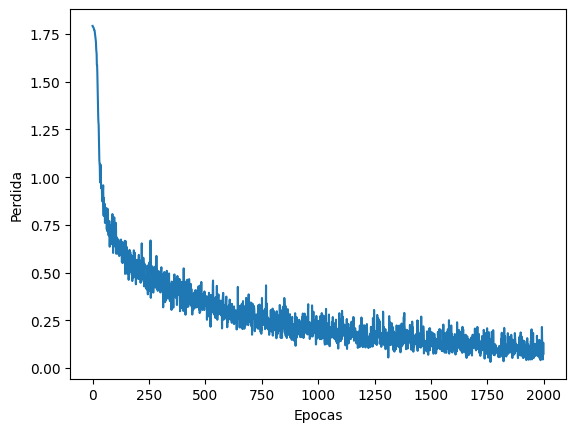

In [10]:

plt.xlabel("Epocas")
plt.ylabel("Perdida")
plt.plot(Entrenar.history["loss"])


In [14]:
uploadedNuevo = files.upload()
for fn in uploadedNuevo.keys():
  with open(fn, 'r') as f:
    lineas = f.readlines()
    letras = ""
    i = 0
    while i < len(lineas):
      matriz = []
      for _ in range(24):
        fila = list(map(int, lineas[i].split("\t")))
        matriz.append(fila)
        i += 1

      matriz = np.array(matriz)
      prediccion = modelo.predict(np.array([matriz[..., np.newaxis]]))
      predecirIndexEtiqueta = np.argmax(prediccion)
      letraPredicha = etiquetasU[predecirIndexEtiqueta]

      letras = letras + letraPredicha
      if len(lineas) - i < 24:
          break
  if len(letras)>1:
    print(f"La palabra predicha es: ", letras)
  else:
    print(f"La letra predicha es: ", letras)

Saving Prueba palabra.txt to Prueba palabra (3).txt
Saving PruebaS.txt to PruebaS (3).txt
Saving PruebaR.txt to PruebaR (3).txt
Saving PruebaO.txt to PruebaO (3).txt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
La palabra predicha es:  mea
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
La letra predicha es:  s
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
La letra predicha es:  r
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
La letra predicha es:  o
